In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# X, y
print(f"first 5 examples of X:\n {X[:5]}")
print(f"first 5 examples of y:\n {y[:5]}")


first 5 examples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 examples of y:
 [1 1 1 1 0]


In [ ]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [ ]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

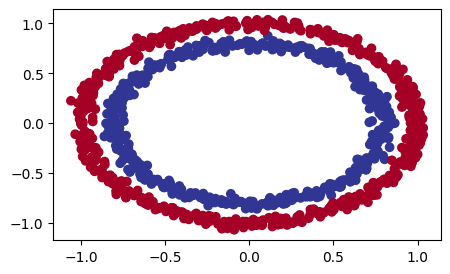

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(5, 3))
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
import torch
import torch.nn as nn
import tensorflow as tf
torch.__version__

'2.2.1+cu121'

In [ ]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# View the first five samples
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
# split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
X_train
type(X_test)
len(X_train), len(X_test)

(800, 200)

In [ ]:
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
class CircleModelV0(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  def forward(self, x):
    return self.layer_2(self.layer_1(x))

  #   # alternative to the layer design and forward func above
  #   self.two_linear = nn.Sequential(
  #   nn.Linear(in_features=2, out_features=5),
  #   nn.Linear(in_features=5, out_features=1)
  #   ).to(device)

  # def forward(self, x):
  #   return self.two_linear(x)



model0 = CircleModelV0().to(device)
model0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
# # the model could be created as below, which is also demonstrated above as an alterntive
# model0 = nn.Sequential(
#     nn.Linear(in_features=2, out_features=5),
#     nn.Linear(in_features=5, out_features=1)
# ).to(device)

# model0

In [ ]:
# model0.state_dict()

In [ ]:
# # # untrained predictions
# untrained_preds = model0(X_test.to(device))

# print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
# print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
# print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
# print(f"\nFirst 10 test labels:\n{y_test[:10]}")

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model0.parameters(),
                            lr=0.1)

In [ ]:
# model0.state_dict()

In [ ]:
def accuracy(y_pred, y_true):
  correctno = torch.eq(y_true, y_pred).sum().item()
  acc = (correctno/len(y_pred)) * 100
  return acc

In [ ]:
# model0.eval()
# with torch.inference_mode():
#     y_logits = model0(X_test.to(device))[:5]

# y_logits

In [ ]:
# y_pred_probs = torch.sigmoid(y_logits)
# y_pred_probs

In [ ]:
# y_preds = torch.round(y_pred_probs)

# y_pred_labels = torch.round(torch.sigmoid(model0(X_test.to(device))[:5]))

# print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# y_preds.squeeze()

In [ ]:
# y_test[: 5]

## Let's build a Train and Test Loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


for epoch in range(epochs):
  #Training
  model0.train()
  # Forward Pass
  y_logits = model0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy(y_true=y_train, y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model0.eval()

  with torch.inference_mode():
    test_logits = model0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy(y_true=y_test,
                        y_pred=test_pred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69569, Acc: 50.00% | Test Loss: 0.69721, Test Acc: 50.00%
Epoch: 10 | Loss: 0.69403, Acc: 50.00% | Test Loss: 0.69615, Test Acc: 50.00%
Epoch: 20 | Loss: 0.69343, Acc: 46.00% | Test Loss: 0.69585, Test Acc: 48.50%
Epoch: 30 | Loss: 0.69321, Acc: 49.00% | Test Loss: 0.69577, Test Acc: 47.50%
Epoch: 40 | Loss: 0.69312, Acc: 49.50% | Test Loss: 0.69573, Test Acc: 46.50%
Epoch: 50 | Loss: 0.69308, Acc: 50.38% | Test Loss: 0.69569, Test Acc: 46.50%
Epoch: 60 | Loss: 0.69306, Acc: 50.50% | Test Loss: 0.69564, Test Acc: 46.50%
Epoch: 70 | Loss: 0.69305, Acc: 50.50% | Test Loss: 0.69559, Test Acc: 46.50%
Epoch: 80 | Loss: 0.69304, Acc: 50.75% | Test Loss: 0.69553, Test Acc: 46.50%
Epoch: 90 | Loss: 0.69303, Acc: 50.38% | Test Loss: 0.69547, Test Acc: 46.50%
Epoch: 100 | Loss: 0.69302, Acc: 50.50% | Test Loss: 0.69542, Test Acc: 46.50%
Epoch: 110 | Loss: 0.69302, Acc: 50.62% | Test Loss: 0.69537, Test Acc: 46.00%
Epoch: 120 | Loss: 0.69301, Acc: 50.62% | Test Loss: 0.69532, T

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if it is not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

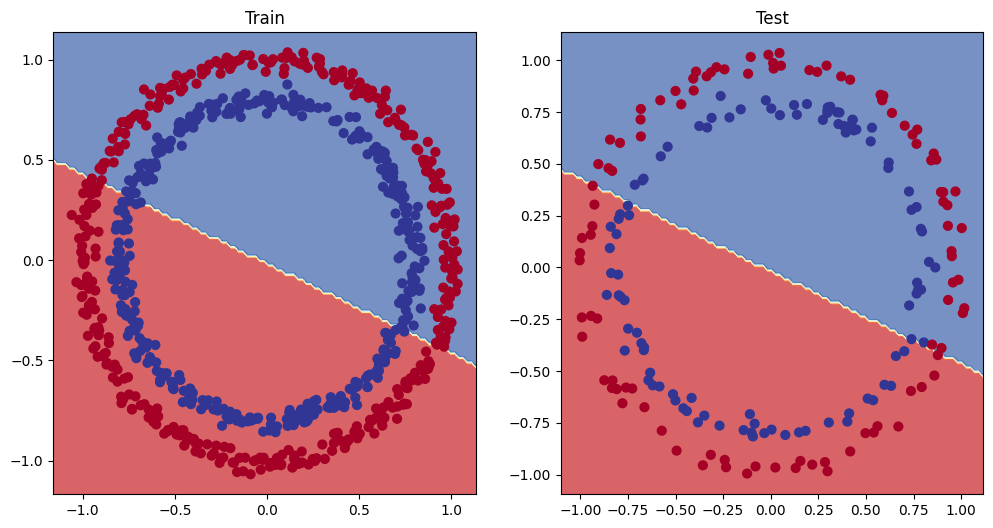

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model0, X_test, y_test)


In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer1 = nn.Linear(in_features=2, out_features=10, bias=True)
    self.layer2 = nn.Linear(in_features=10, out_features= 10, bias=True)
    self.layer3 = nn.Linear(in_features=10, out_features=1, bias=True)

  def forward(self, x):
    # z = self.layer1(x)
    # z = self.layer2(z)
    # z = self.layer3(z)
    # return z
    # # or alternatively we can compute them all at once in a single line which is faster
    return self.layer3(self.layer2(self.layer1(x)))

model1 = CircleModelV1().to(device)
model1

# model1.state_dict()

CircleModelV1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model1.parameters(),
                            lr=0.1)
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model0.train()

  y_logits = model1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_pred, y_train)
  acc = accuracy(y_train, y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model1.eval()

  with torch.inference_mode():
    test_logits = model1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    loss = loss_fn(test_logits,
                   y_test)

    test_acc = accuracy(y_true=y_test,
                        y_pred=test_pred)

    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5}, Test Acc: {test_acc:.5}%")


Epoch: 0 | Loss: 0.69261, Acc: 50.88% | Test Loss: 0.69468, Test Acc: 51.0%
Epoch: 100 | Loss: 0.69261, Acc: 50.88% | Test Loss: 0.69468, Test Acc: 51.0%
Epoch: 200 | Loss: 0.69261, Acc: 50.88% | Test Loss: 0.69468, Test Acc: 51.0%
Epoch: 300 | Loss: 0.69261, Acc: 50.88% | Test Loss: 0.69468, Test Acc: 51.0%
Epoch: 400 | Loss: 0.69261, Acc: 50.88% | Test Loss: 0.69468, Test Acc: 51.0%
Epoch: 500 | Loss: 0.69261, Acc: 50.88% | Test Loss: 0.69468, Test Acc: 51.0%
Epoch: 600 | Loss: 0.69261, Acc: 50.88% | Test Loss: 0.69468, Test Acc: 51.0%
Epoch: 700 | Loss: 0.69261, Acc: 50.88% | Test Loss: 0.69468, Test Acc: 51.0%
Epoch: 800 | Loss: 0.69261, Acc: 50.88% | Test Loss: 0.69468, Test Acc: 51.0%
Epoch: 900 | Loss: 0.69261, Acc: 50.88% | Test Loss: 0.69468, Test Acc: 51.0%


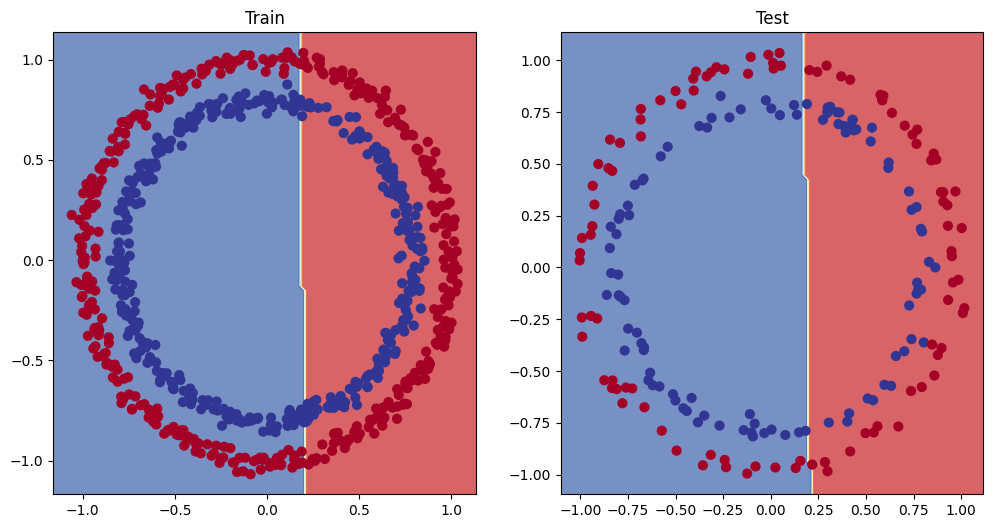

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model1, X_test, y_test)


In [ ]:
## Let's' buil a mode with non-linear activation functions

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=10)
    self.layer2 = nn.Linear(in_features=10, out_features=10)
    self.layer3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))


model2 = CircleModelV2()
model2

CircleModelV2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model2.parameters(),
                            lr=0.1)

In [ ]:
torch.manual_seed(42)
torch.manual_seed(42)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test  = X_test.to(device), y_test.to(device)

epochs = 1000

for epoch in range(epochs):
  model2.train()

  y_logits = model2(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy(y_true=y_train,
                 y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # model2.eval()

  # with torch.inference_mode():
  #   test_logits = model2(X_test)
  #   test_pred = torch.round(torch.sigmoid(test_logits))

  #   test_loss = loss_fn(test_logits, y_test)
  #   test_acc = accuracy(y_true=y_test,
  #                       y_pred=test_pred)

  model2.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model2(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
    # 2. Calcuate loss and accuracy
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy(y_true=y_test,
                            y_pred=test_pred)


    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69319, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test Loss: 0.69102, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test Loss: 0.68940, Test Accuracy: 55.00%
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test Loss: 0.68723, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test Loss: 0.68411, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test Loss: 0.67941, Test Accuracy: 56.50%
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test Loss: 0.67285, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test Loss: 0.66322, Test Accuracy: 59.00%
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test Loss: 0.64757, Test Accuracy: 67.50%
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test Loss: 0.62145, Test Accuracy: 79.00%


In [ ]:
model2.eval()

with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model2(X_test))).squeeze()

y_preds[:10] == y_test[:10]
# print(y_preds.shape)
# print(y_test.shape)

tensor([ True,  True,  True,  True, False,  True,  True,  True,  True,  True])

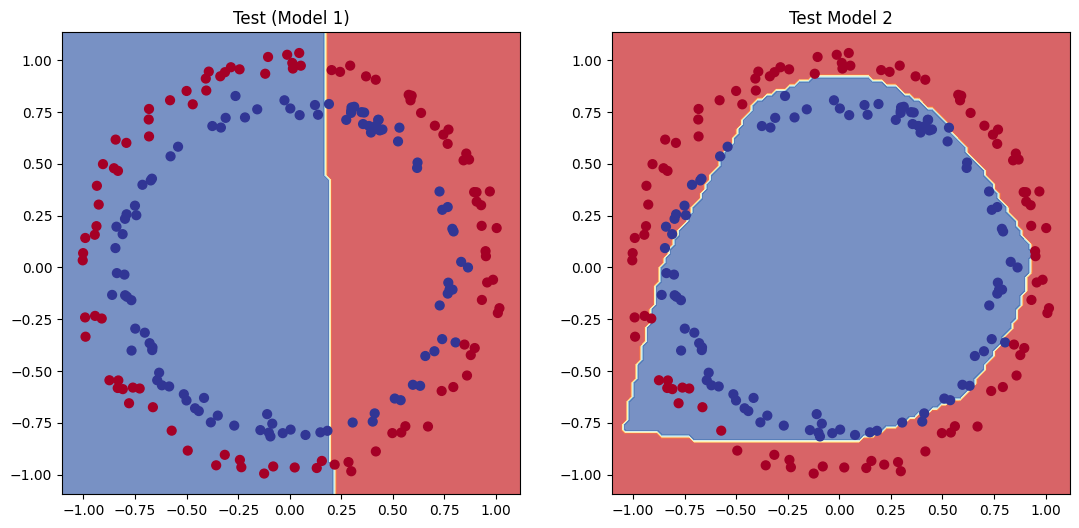

In [ ]:
plt.figure(figsize=(13, 6))
# plt.subplot(1, 2, 1)
# plt.title("Train")
# plot_decision_boundary(model2, X_train, y_train)
plt.subplot(1, 2, 1)
plt.title("Test (Model 1)")
plot_decision_boundary(model1, X_test, y_test)
plt.subplot(1, 2, 2)
plt.title("Test Model 2")
plot_decision_boundary(model2, X_test, y_test)

In [ ]:
## Let's have a look at how ReLu works

A = torch.arange(-10, 10, 1, dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

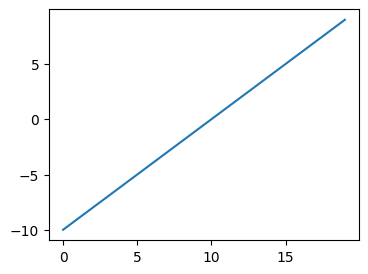

In [ ]:
plt.figure(figsize=(4, 3))

plt.plot(A)

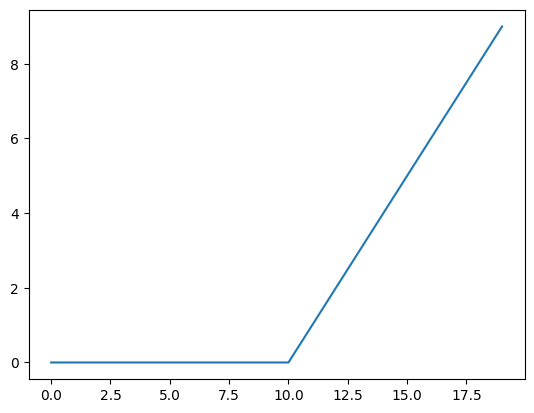

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

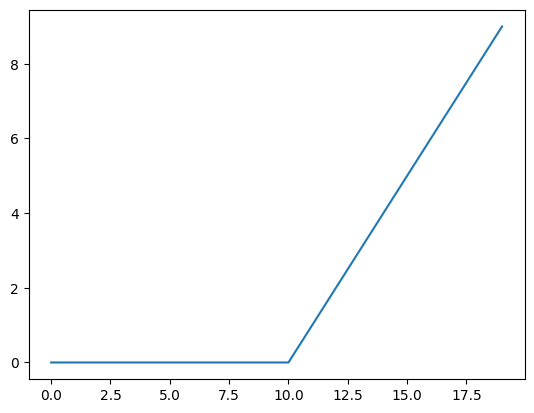

In [ ]:
plt.plot(relu(A))

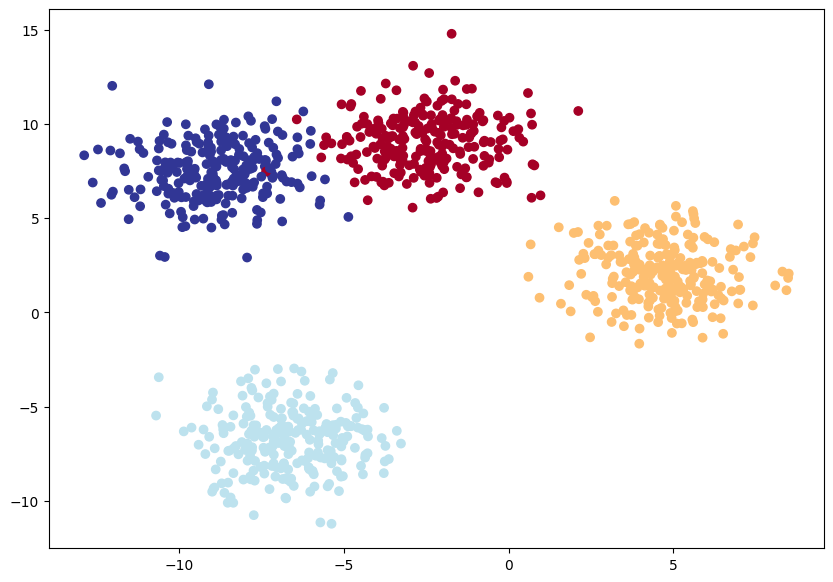

In [ ]:

## Let's do some multi-class classification

import torch
import torch.nn as nn
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob, = make_blobs(n_samples=1000,
                             n_features=NUM_FEATURES,
                             centers=NUM_CLASSES,
                             cluster_std=1.5,
                             random_state=RANDOM_SEED)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                       y_blob,
                                                                       test_size=0.2,
                                                                       random_state=RANDOM_SEED)

plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """Initializes Multi-class Classification Model

    Args:
      input_features (int): Number of input features to the model
      output_features (int): Number of output features (numbe rof output classes)
      hidden_units (int): Number of hidden units between

    Returns:

    Examples:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(), # you can comment the ReLUs to compare with fully linear model
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

model3 = BlobModel(input_features=2,
                   output_features=4,
                   hidden_units=8).to(device)

model3

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
# to figure out the values for hidden units and output features above, we can also do the coding below
# you may start with the line of code below
X_blob_train.shape, y_blob_train[:5]

# but better you discover the unique values of the output
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

## Create the loss function and the optimizer...

In [ ]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model3.parameters(),
                            lr=0.1)

In [ ]:
model3.eval()
with torch.inference_mode():
  y_logits = model3(X_blob_test.to(device))

y_logits[:10]

# We have got some logtis above and we have to convert them into prediction probabilities
#But how? Through an activation function? That's right!

tensor([[-1.2464, -0.8990, -1.4913, -0.5871],
        [ 0.8125, -1.6255,  0.7427,  1.9673],
        [ 0.2863, -0.3251,  0.2584,  0.0986],
        [-0.7877, -0.5911, -0.9520, -0.4658],
        [-0.4386, -1.8562, -0.5667,  1.0392],
        [ 0.9511, -1.8409,  0.8746,  2.3116],
        [ 0.2921, -0.3947,  0.2962,  0.1806],
        [ 0.0616, -1.7666, -0.0540,  1.3365],
        [ 0.2854, -0.3542,  0.2511,  0.1372],
        [-0.0874, -1.7541, -0.1803,  1.2494]])

In [ ]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [ ]:
y_pred_probs = torch.softmax (y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2464, -0.8990, -1.4913, -0.5871],
        [ 0.8125, -1.6255,  0.7427,  1.9673],
        [ 0.2863, -0.3251,  0.2584,  0.0986],
        [-0.7877, -0.5911, -0.9520, -0.4658],
        [-0.4386, -1.8562, -0.5667,  1.0392]])
tensor([[0.1949, 0.2758, 0.1525, 0.3768],
        [0.1926, 0.0168, 0.1796, 0.6111],
        [0.2990, 0.1623, 0.2908, 0.2479],
        [0.2250, 0.2738, 0.1909, 0.3104],
        [0.1537, 0.0372, 0.1352, 0.6738]])


In [ ]:
torch.sum(y_pred_probs[0])

tensor(1.)

In [ ]:
# here are our predictions
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([3, 3, 0, 3, 3, 3, 2, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0,
        0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3,
        0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 1, 3, 0, 0,
        0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0, 3,
        0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 0, 0, 3, 0, 0, 3, 3, 0, 0, 3, 3,
        1, 3, 0, 3, 3, 3, 0, 3])

In [ ]:
# here are the true labels
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

# Let's create the training and testing loop for a multi-class PyTorch model:

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    model3.train()

    y_logits = model3(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy(y_true=y_blob_train,
                  y_pred=y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model3.eval()

    with torch.inference_mode():
      test_logits = model3(X_blob_test)
      test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy(y_true=y_blob_test,
                          y_pred=test_preds)

      if epoch % 10 == 0:
          print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.18218, Accuracy: 29.50% | Test Loss: 0.92226, Test Accuracy: 70.00%
Epoch: 10 | Loss: 0.48415, Accuracy: 96.75% | Test Loss: 0.48694, Test Accuracy: 97.50%
Epoch: 20 | Loss: 0.33571, Accuracy: 99.00% | Test Loss: 0.34120, Test Accuracy: 99.50%
Epoch: 30 | Loss: 0.25764, Accuracy: 99.00% | Test Loss: 0.25995, Test Accuracy: 99.50%
Epoch: 40 | Loss: 0.18760, Accuracy: 99.00% | Test Loss: 0.18233, Test Accuracy: 99.50%
Epoch: 50 | Loss: 0.10798, Accuracy: 99.00% | Test Loss: 0.09815, Test Accuracy: 99.50%
Epoch: 60 | Loss: 0.06487, Accuracy: 99.12% | Test Loss: 0.05628, Test Accuracy: 99.50%
Epoch: 70 | Loss: 0.04906, Accuracy: 99.25% | Test Loss: 0.04078, Test Accuracy: 99.50%
Epoch: 80 | Loss: 0.04183, Accuracy: 99.12% | Test Loss: 0.03347, Test Accuracy: 99.50%
Epoch: 90 | Loss: 0.03775, Accuracy: 99.12% | Test Loss: 0.02922, Test Accuracy: 99.50%


In [ ]:
model3.eval()
with torch.inference_mode():
  y_logits = model3(X_blob_test)

y_logits[:10]

tensor([[  2.9849,   9.1582,  -9.3079, -12.6296],
        [  2.8329,  -8.9875,   2.0465,   8.4220],
        [ -2.0086,  -4.2221,   4.5588,  -0.1115],
        [  0.8716,   6.1868,  -4.9749,  -8.4562],
        [  6.6117,   1.7516,  -8.3380,  -4.8122],
        [  3.1911, -10.7773,   2.4867,  10.1428],
        [ -1.9692,  -3.8132,   4.1783,   0.1711],
        [  5.8630,  -1.0438,  -5.4178,  -0.7326],
        [ -2.4899,  -5.3520,   5.5467,  -0.1460],
        [  6.0587,  -0.2768,  -6.1471,  -2.0405]])

In [ ]:
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[2.0802e-03, 9.9792e-01, 9.5367e-09, 3.4417e-10],
        [3.7180e-03, 2.7340e-08, 1.6936e-03, 9.9459e-01],
        [1.3903e-03, 1.5198e-04, 9.8919e-01, 9.2685e-03],
        [4.8922e-03, 9.9509e-01, 1.4138e-05, 4.3502e-07],
        [9.9230e-01, 7.6901e-03, 3.1921e-07, 1.0847e-05],
        [9.5565e-04, 8.2012e-10, 4.7248e-04, 9.9857e-01],
        [2.0955e-03, 3.3147e-04, 9.7976e-01, 1.7816e-02],
        [9.9763e-01, 9.9850e-04, 1.2583e-05, 1.3631e-03],
        [3.2220e-04, 1.8413e-05, 9.9630e-01, 3.3579e-03],
        [9.9792e-01, 1.7685e-03, 4.9910e-06, 3.0315e-04]])

In [ ]:
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

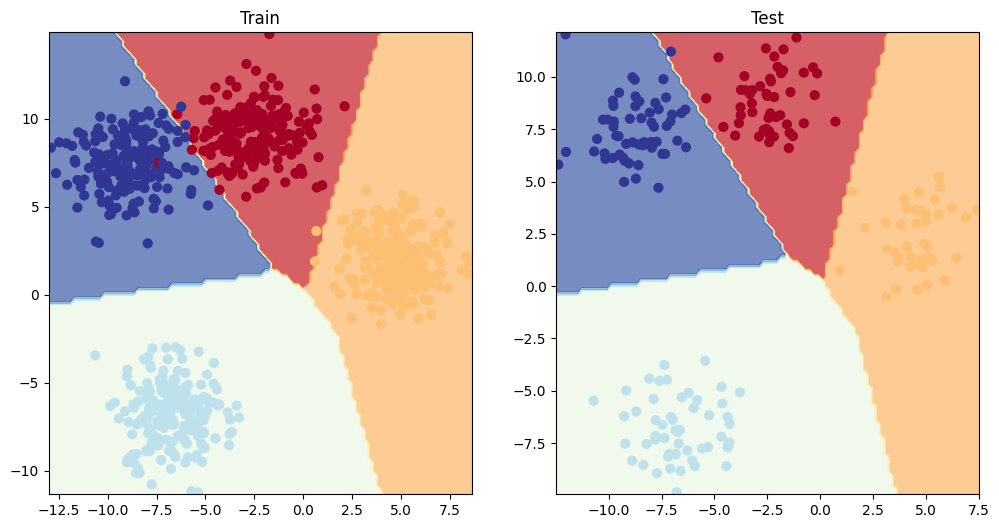

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model3, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model3, X_blob_test, y_blob_test)

## Let's do some evaluation exploiting different torch metrics

In [ ]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 757.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [ ]:
try:
    from torchmetrics import Accuracy
except:
    !pip install torchmetrics==0.9.3 # this is the version we're using in this notebook (later versions exist here: https://torchmetrics.readthedocs.io/en/stable/generated/CHANGELOG.html#changelog)
    from torchmetrics import Accuracy

# Setup metric and make sure it's on the target device
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

# Calculate accuracy
# We will normally achieve the results we have already collected with our own accuracy function
torchmetrics_accuracy(y_preds, y_blob_test)


tensor(0.9950)

device(type='cpu')